<a href="https://colab.research.google.com/github/exdsgift/Data-Science-Projects-UNIVR/blob/main/Fatalities_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**packages:** Importing the most useful packages to perform data exploration and visualization

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# **PART 1:** dataset import and Data Cleaning

The dataset is available at the following link: https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian. It reports data on victims of terrorism in Israel and the war in Palestine.

This notebook aims to analyse events and fatalities by

- Year, month, and day of the month of events that led to fatalities
- Victim profiles such as age, gender, citizenship, participation in hostilities etc
- Event locations, location districts, and location regions
- Type of injury, type of ammunition, and party responsible for killings, among others.

## Upload and first check at the data

In [2]:
fatalities_df = pd.read_csv('drive/MyDrive/fatalities_isr_pse_conflict_2000_to_2023.csv')
fatalities_df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [3]:
fatalities_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
name,'Abd a-Rahman Suleiman Muhammad Abu Daghash,Usayed Farhan Muhammad 'Ali Abu 'Ali,'Abdallah 'Imad Sa'ed Abu Hassan,Durgham Muhammad Yihya al-Akhras,Raafat 'Omar Ahmad Khamaisah,'Ata Yasser 'Ata Musa,Yusef Salem Yusef Radwan,Mahmoud Khaled S'ud 'Ar'arawi,Mahmoud 'Ali Nafe'a a-S'adi,Milad Munzer Wajih a-Ra'i,Muhammad Yusef Isma'il Zbeidat,'Ayed Samih Khaled Abu Harb,'Abd a-Rahim Fayez 'Awad Ghanam,Dawood 'Abd a-Razeq Fayez Fayez,Khaled Samer Fadel a-Z'anin
date_of_event,2023-09-24,2023-09-24,2023-09-22,2023-09-20,2023-09-19,2023-09-19,2023-09-19,2023-09-19,2023-09-19,2023-09-09,2023-09-05,2023-09-05,2023-09-01,2023-08-31,2023-08-30
age,32.0,21.0,16.0,19.0,15.0,29.0,24.0,25.0,23.0,15.0,16.0,21.0,45.0,41.0,14.0
citizenship,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian
event_location,Nur Shams R.C.,Nur Shams R.C.,Kfar Dan,'Aqbat Jaber R.C.,Jenin R.C.,Jenin R.C.,Gaza City,Jenin R.C.,Jenin R.C.,al-'Arrub R.C.,Argaman,Nur Shams R.C.,'Aqqabah,Beit Sira,al-Musrarah
event_location_district,Tulkarm,Tulkarm,Jenin,Jericho,Jenin,Jenin,Gaza,Jenin,Jenin,Hebron,Jericho,Tulkarm,Tubas,Ramallah and al-Bira,East Jerusalem
event_location_region,West Bank,West Bank,West Bank,West Bank,West Bank,West Bank,Gaza Strip,West Bank,West Bank,West Bank,West Bank,West Bank,West Bank,West Bank,West Bank
date_of_death,2023-09-24,2023-09-24,2023-09-22,2023-09-20,2023-09-19,2023-09-20,2023-09-19,2023-09-19,2023-09-19,2023-09-09,2023-09-05,2023-09-05,2023-09-01,2023-08-31,2023-08-30
gender,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M
took_part_in_the_hostilities,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the following dataset has only one float variable (age) while all others are objects.

In [4]:
fatalities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

observing the size of the dataset allows one to know which variables have excessive null values.

In [5]:
fatalities_df.shape

(11124, 16)

In [6]:
fatalities_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10995.0,26.745703,13.780548,1.0,19.0,23.0,31.0,112.0


## Check NA values

in this case, the choice to remove rows with null values is wrong, since since since most of them are descriptive values, they do not affect the data statistically but only add information

In [7]:
print(sum(fatalities_df.isna().sum()))
print(fatalities_df.duplicated().sum())

7539
7


In [8]:
fatalities_df.isna().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

let's check the percentage about this informations

In [9]:
print(f"percentage of age NA value: \t{(fatalities_df['age'].isna().sum()/len(fatalities_df))*100:.2f}%")
print(f"percentage of gender NA value: \t{(fatalities_df['gender'].isna().sum()/len(fatalities_df))*100:.2f}%")
print(f"percentage of took_part_in_the_hostilities NA value: \t{(fatalities_df['took_part_in_the_hostilities'].isna().sum()/len(fatalities_df))*100:.2f}%")
print(f"percentage of place_of_residence NA value: \t{(fatalities_df['place_of_residence'].isna().sum()/len(fatalities_df))*100:.2f}%")
print(f"percentage of place_of_residence_district NA value: \t{(fatalities_df['place_of_residence_district'].isna().sum()/len(fatalities_df))*100:.2f}%")
print(f"percentage of type_of_injury NA value: \t{(fatalities_df['type_of_injury'].isna().sum()/len(fatalities_df))*100:.2f}%")
print(f"percentage of ammunition NA value: \t{(fatalities_df['ammunition'].isna().sum()/len(fatalities_df))*100:.2f}%")
print(f"percentage of notes NA value: \t{(fatalities_df['notes'].isna().sum()/len(fatalities_df))*100:.2f}%")

percentage of age NA value: 	1.16%
percentage of gender NA value: 	0.18%
percentage of took_part_in_the_hostilities NA value: 	12.86%
percentage of place_of_residence NA value: 	0.61%
percentage of place_of_residence_district NA value: 	0.61%
percentage of type_of_injury NA value: 	2.62%
percentage of ammunition NA value: 	47.22%
percentage of notes NA value: 	2.52%


based on this information, the data will be rearranged as follows:
- Replace missing values for the variable `age` with the **mean value** (1.16%).
- Missing values for the variables `sex`, `place_of_residence`, `place_of_residence_district`, `type_of_location`, and `notes` are replaced with the **mode value**. this is so as not to change the distribution of the data too much.
- **Remove** the variables `has_participated_in_hostilities`, `ammunition` from the variable itself. The percentage of null values is excessive and would not lead to useful information for the entire population of the dataset.

In [10]:
age_mean = fatalities_df['age'].mean()
fatalities_df['age'].fillna(age_mean, inplace=True)

In [11]:
gender_mode = fatalities_df['gender'].mode()[0]
fatalities_df['gender'].fillna(gender_mode, inplace=True)

place_of_residence_mode = fatalities_df['place_of_residence'].mode()[0]
fatalities_df['place_of_residence'].fillna(place_of_residence_mode, inplace=True)

place_of_residence_district_mode = fatalities_df['place_of_residence_district'].mode()[0]
fatalities_df['place_of_residence_district'].fillna(place_of_residence_district_mode, inplace=True)

type_of_injury_mode = fatalities_df['type_of_injury'].mode()[0]
fatalities_df['type_of_injury'].fillna(type_of_injury_mode, inplace=True)

notes_mode = fatalities_df['notes'].mode()[0]
fatalities_df['notes'].fillna(notes_mode, inplace=True)

In [12]:
fatalities_df.drop(['took_part_in_the_hostilities', 'ammunition'], axis=1, inplace=True)

We now check again for null values as we did previously

In [13]:
fatalities_df.isna().sum()

name                           0
date_of_event                  0
age                            0
citizenship                    0
event_location                 0
event_location_district        0
event_location_region          0
date_of_death                  0
gender                         0
place_of_residence             0
place_of_residence_district    0
type_of_injury                 0
killed_by                      0
notes                          0
dtype: int64

now that the null values have been settled we can proceed with EDA

## Understanding the values

In [14]:
fatalities_df['type_of_injury'].value_counts()

gunfire                         10140
explosion                         555
shelling                          311
stabbing                           48
house demolition                   25
hit by a vehicle                   18
beating                             9
stones throwing                     6
being bludgeoned with an axe        4
fire                                4
physically assaulted                2
physical assault                    1
Strangulation                       1
Name: type_of_injury, dtype: int64

In [15]:
fatalities_df['killed_by'].value_counts()

Israeli security forces    10000
Palestinian civilians       1028
Israeli civilians             96
Name: killed_by, dtype: int64

In [16]:
fatalities_df['gender'].value_counts()

M    9701
F    1423
Name: gender, dtype: int64

In [17]:
fatalities_df['citizenship'].value_counts()

Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: citizenship, dtype: int64

In [18]:
fatalities_df['event_location'].value_counts()

Gaza City              2232
Rafah                   832
Khan Yunis              538
Jabalya R.C.            477
Beit Lahiya             471
                       ... 
al-'Esawiyah              1
Elazar                    1
Kibbutz Beit Govrin       1
Kh. Shuweika              1
Masha                     1
Name: event_location, Length: 494, dtype: int64

## Check for some correlations between variables

In [19]:
fatalities_df_corr = fatalities_df.corr(numeric_only=True)
fatalities_df_corr

,age
age,1.0


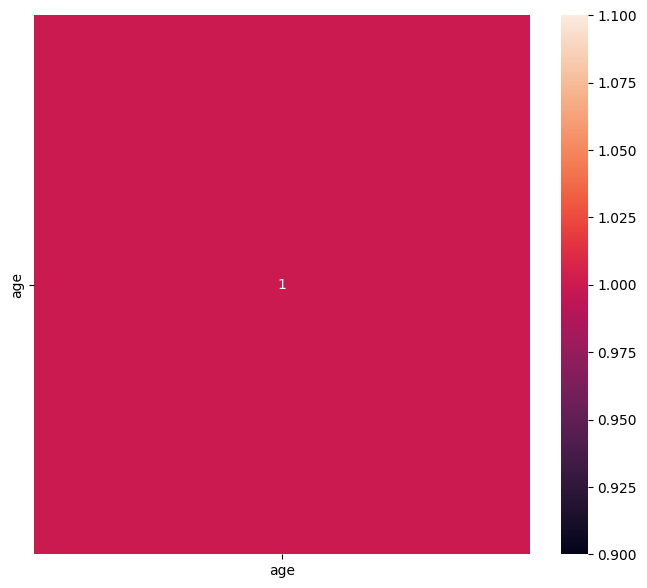

In [20]:
plt.figure(figsize = (8,7))
sns.heatmap(fatalities_df_corr, annot = True)
plt.show()

As we can observe from the following situation, we cannot create a correlation graph with Seaborn since most of the variables in the dataset are categorical (Objects) and not numerical. in this case, we use scatterplots to study the distribution of the variables and observe the correlation graphically.

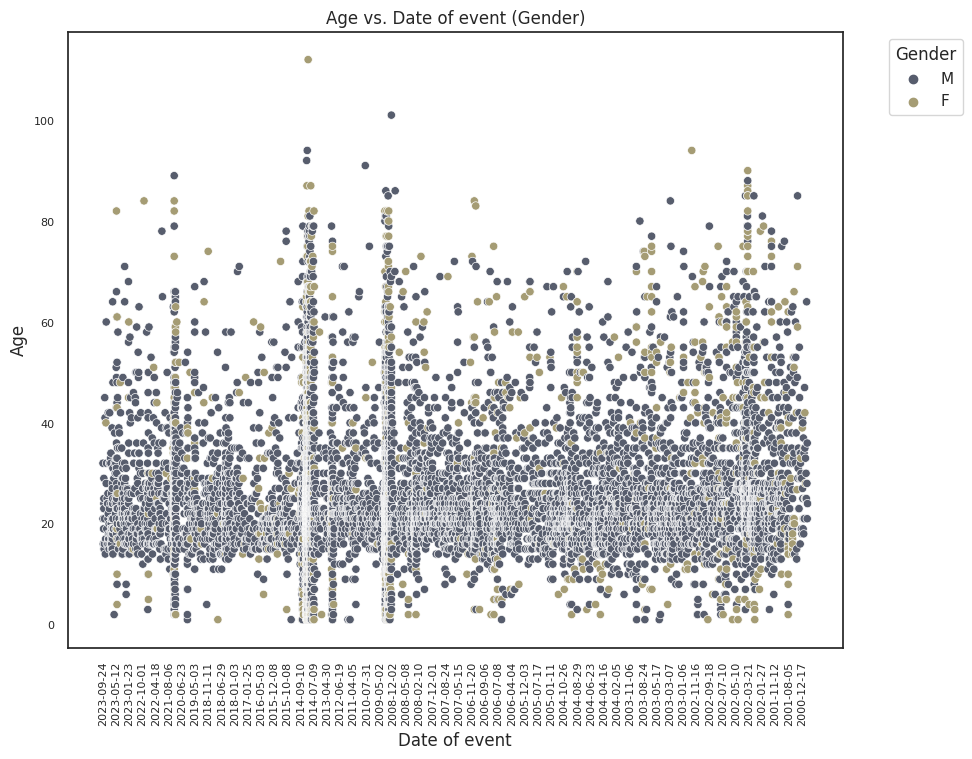

In [212]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = fatalities_df, x = 'date_of_event', y= 'age',  hue='gender', palette='cividis')
plt.xlabel('Date of event')
plt.ylabel('Age')
plt.title('Age vs. Date of event (Gender)')
plt.xticks(rotation='vertical', fontsize=8)
plt.yticks(rotation = 0, fontsize=8)

every_nth = 45
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

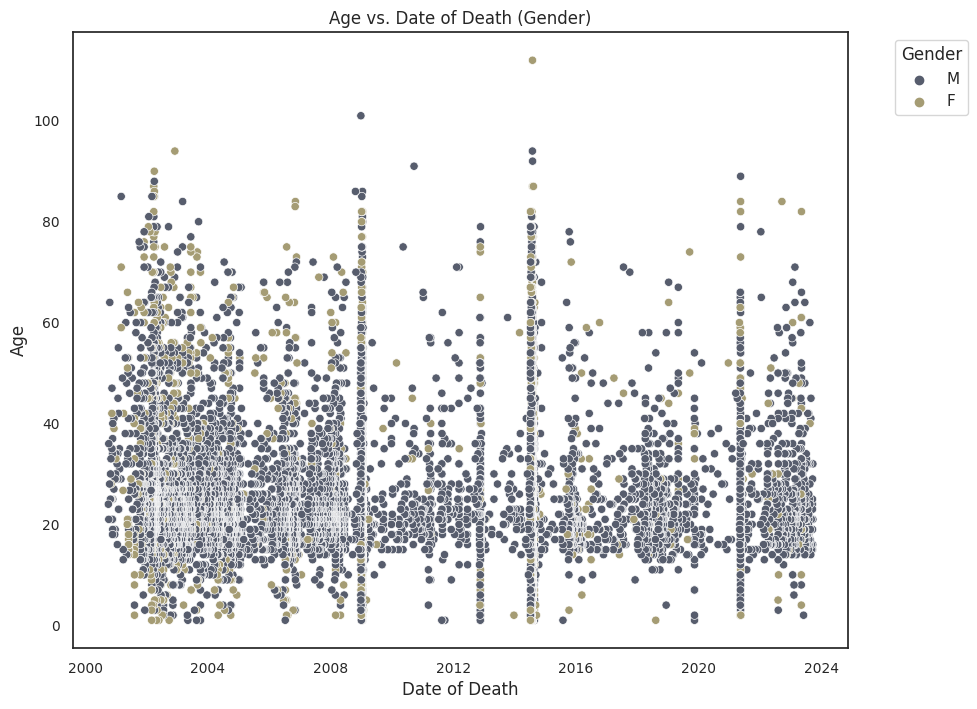

In [211]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = fatalities_df, x = 'date_of_death', y= 'age', hue='gender', palette='cividis')
plt.xlabel('Date of Death')
plt.ylabel('Age')
plt.title('Age vs. Date of Death (Gender)')
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

from the following chart we can see that most of the recorded deaths occurred between 2000 and 2008 and almost all involved men between the ages of 18 and 42.

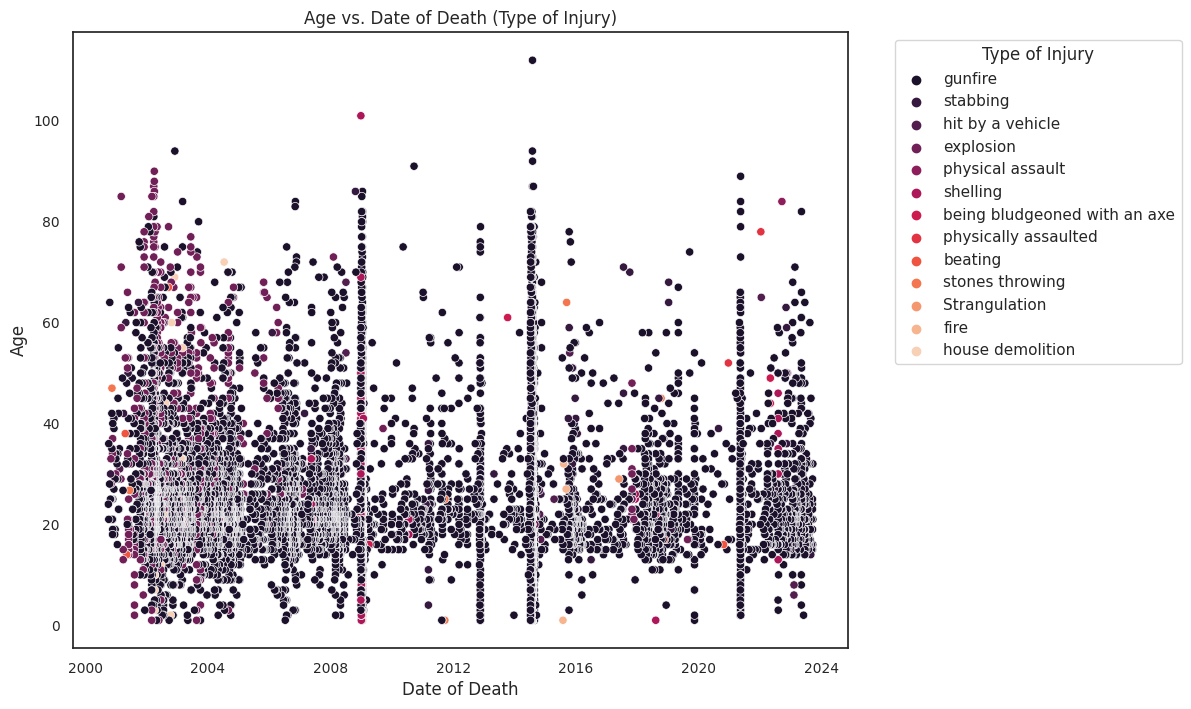

In [210]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = fatalities_df, x = 'date_of_death', y= 'age', hue='type_of_injury', palette='rocket')
plt.xlabel('Date of Death')
plt.ylabel('Age')
plt.title('Age vs. Date of Death (Type of Injury)')
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

plt.legend(title='Type of Injury', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

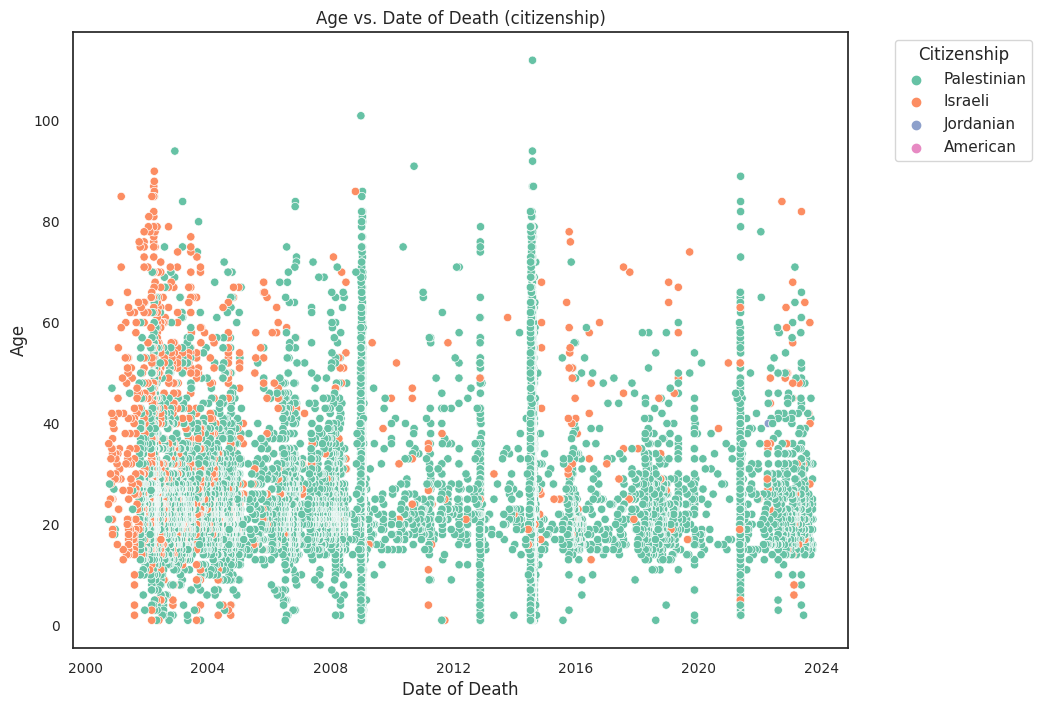

In [209]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = fatalities_df, x = 'date_of_death', y= 'age', hue='citizenship', palette='Set2')
plt.xlabel('Date of Death')
plt.ylabel('Age')
plt.title('Age vs. Date of Death (citizenship)')
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

plt.legend(title='Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

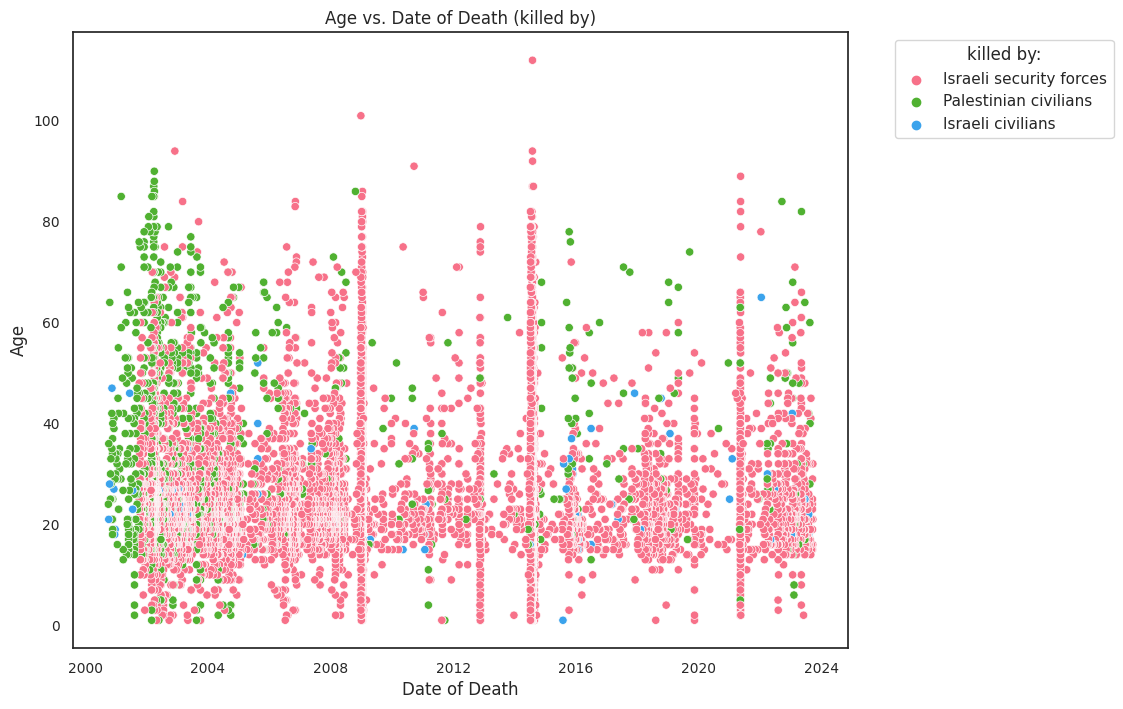

In [208]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = fatalities_df, x = 'date_of_death', y= 'age', hue='killed_by', palette='husl')
plt.xlabel('Date of Death')
plt.ylabel('Age')
plt.title('Age vs. Date of Death (killed by)')
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

plt.legend(title='killed by:', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# **PART 2:** Exploratory Data Analysis

## Deaths by nationality

In [22]:
fatalities_df['citizenship'].value_counts()

Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: citizenship, dtype: int64

In [23]:
citizen_perc = fatalities_df['citizenship'].value_counts(normalize=True) * 100
citizen = 'citizenship'

tab1 = pd.DataFrame({
    citizen: citizen_perc.index,
    '%': citizen_perc.values
})

tab1['%'] = tab1['%'].map('{:.2f}%'.format)

In [24]:
print(tab1)

   citizenship       %
0  Palestinian  90.72%
1      Israeli   9.25%
2    Jordanian   0.02%
3     American   0.01%


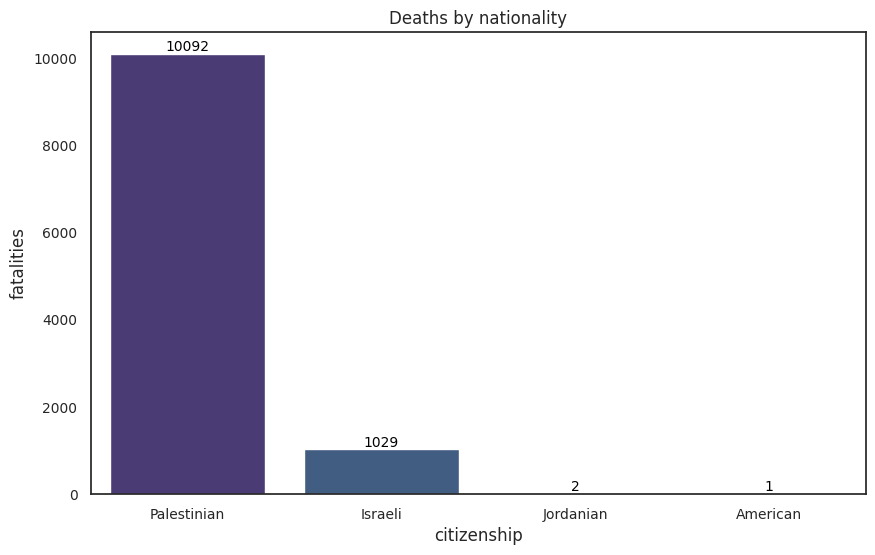

In [207]:
plt.figure(figsize=(10,6))
sns.set(style="white", palette="Set2")
plt.title('Deaths by nationality')


plot1 = sns.countplot(x='citizenship', data=fatalities_df, palette = sns.color_palette("viridis"))

for p in plot1.patches:
    plot1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel("citizenship")
plt.ylabel("fatalities")
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)
plt.show()

we can remove the values for `American`  and `Jordanian` citizenship so that we have a clearer and more useful graph for our investigation.

In [26]:
fatalities_df_2 = fatalities_df[~fatalities_df['citizenship'].isin(['Jordanian', 'American'])]
fatalities_df_2['citizenship'].value_counts()

Palestinian    10092
Israeli         1029
Name: citizenship, dtype: int64

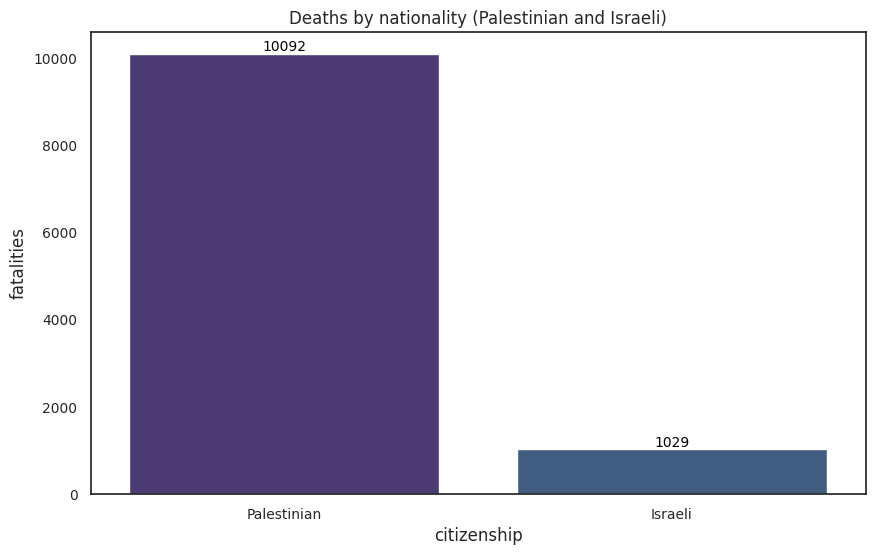

In [206]:
plt.figure(figsize=(10,6))
sns.set(style = "white", palette = "Set2")
plt.title('Deaths by nationality (Palestinian and Israeli)')


plot1 = sns.countplot(x='citizenship', data = fatalities_df_2, palette = sns.color_palette("viridis"))

for p in plot1.patches:
    plot1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel("citizenship")
plt.ylabel("fatalities")
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)
plt.show()

## Analysis of regions with the most recorded deaths

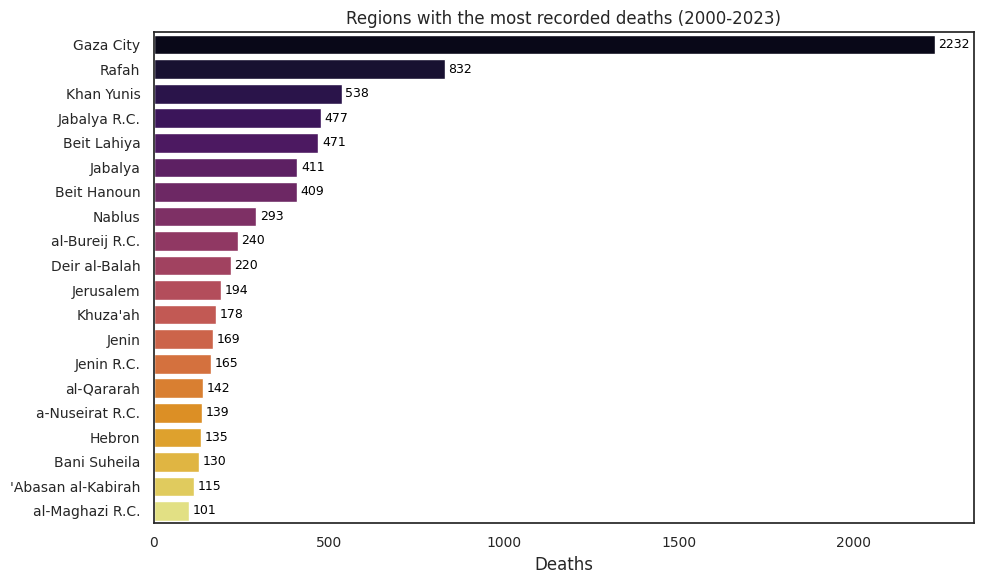

In [205]:
plt.figure(figsize=(10,6))
plt.title('Regions with the most recorded deaths (2000-2023)')
plt.xlabel('Deaths')
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

custom_palette = sns.color_palette("inferno", n_colors=20)

sns.barplot(data = fatalities_df,
            x = fatalities_df['event_location'].value_counts().values[:20],
            y = fatalities_df['event_location'].value_counts().index[:20],
            palette = custom_palette)

for i, v in enumerate(fatalities_df['event_location'].value_counts().values[:20]):
    plt.text(v + 10, i, str(v), color='black', ha='left', va='center', fontsize = 9)

plt.tight_layout()
plt.show()

So the main localities involved in this conflict are the cities of: `Gaza City`, `Rafah`, `Khan Yunis`. From this we delve into the year 2023 and check in which location the most casualties occurred. (remember that the data for 2023 refers to before the Israel Palestine conflict in October 2023)

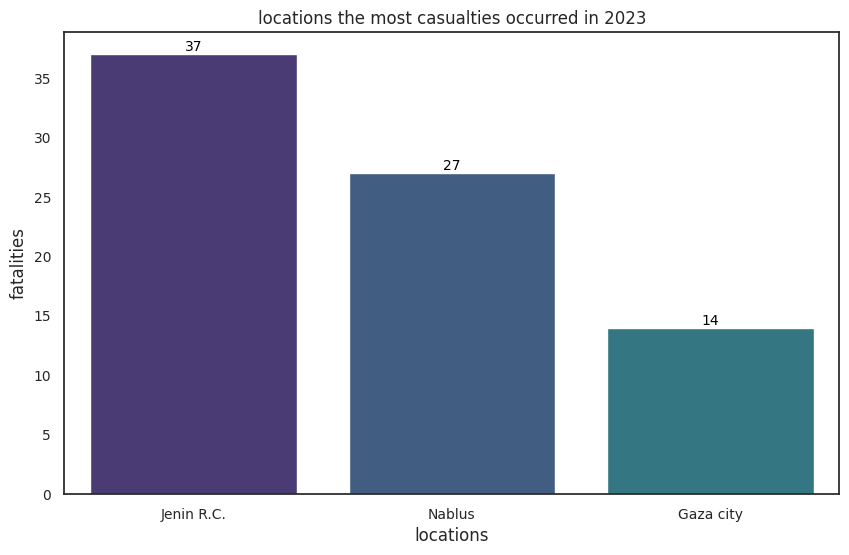

In [204]:
fatalities_df['date_of_death'] = pd.to_datetime(fatalities_df['date_of_death'])
fatalities_df_2023 = fatalities_df[fatalities_df['date_of_death'].dt.year == 2023]
residence_death_counts = fatalities_df_2023['place_of_residence'].value_counts()
top_3_residences = residence_death_counts.head(3)

plt.figure(figsize=(10, 6))
plot2 = sns.barplot(x = top_3_residences.index,
                 y = top_3_residences.values,
                 palette = sns.color_palette("viridis"))

plt.title('locations the most casualties occurred in 2023')
plt.xlabel('locations')
plt.ylabel('fatalities')

plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

for p in plot2.patches:
    plot2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', fontsize = 10, color = 'black', xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

## Analysis of death trends over the years

Transformation of the column containing dates into a format that is easy to manipulate

In [30]:
fatalities_df['date_of_death'] = pd.to_datetime(fatalities_df['date_of_death'])
fatalities_df['year'] = fatalities_df['date_of_death'].dt.year
fatality_by_year = fatalities_df.groupby('year').size().reset_index(name='fatalities')

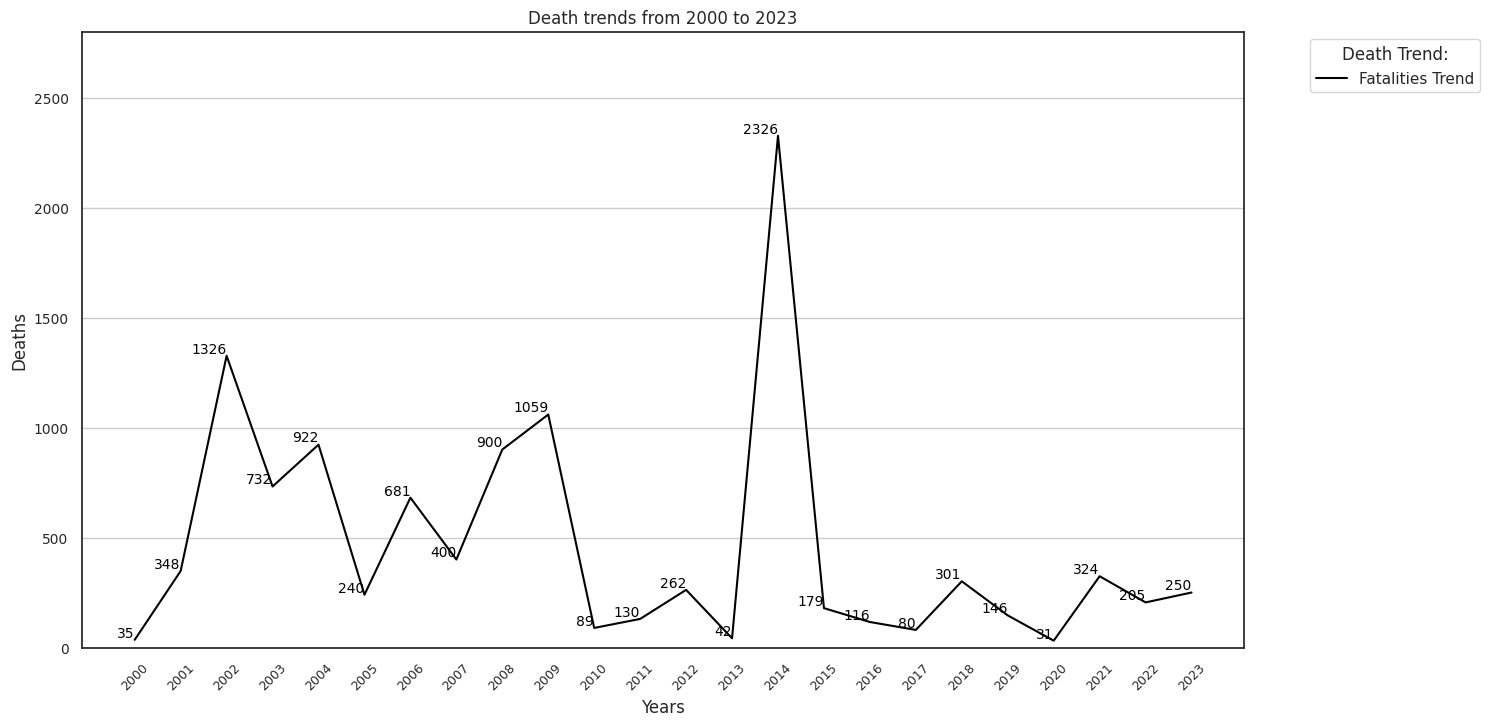

In [238]:
plt.figure(figsize=(15, 8))
plt.title('Death trends from 2000 to 2023')
plt.xlabel('Years')
plt.ylabel('Deaths')
plt.ylim(0, 2800)
plt.xticks(fatality_by_year['year'], rotation = 45, fontsize=9)
plt.yticks(rotation = 0, fontsize=10)

fatality_by_year = fatalities_df.groupby('year').size().reset_index(name='fatalities')

plot4 = sns.lineplot(x='year',
                     y='fatalities',
                     data=fatality_by_year,
                     markers=True,
                     color='black',
                     label='Fatalities Trend')

for x, y in zip(fatality_by_year['year'], fatality_by_year['fatalities']):
    plt.text(x, y, f'{y}', ha='right', va='bottom', fontsize=10, color='black')

plt.legend(title='Death Trend:', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, axis='y')
plt.show()

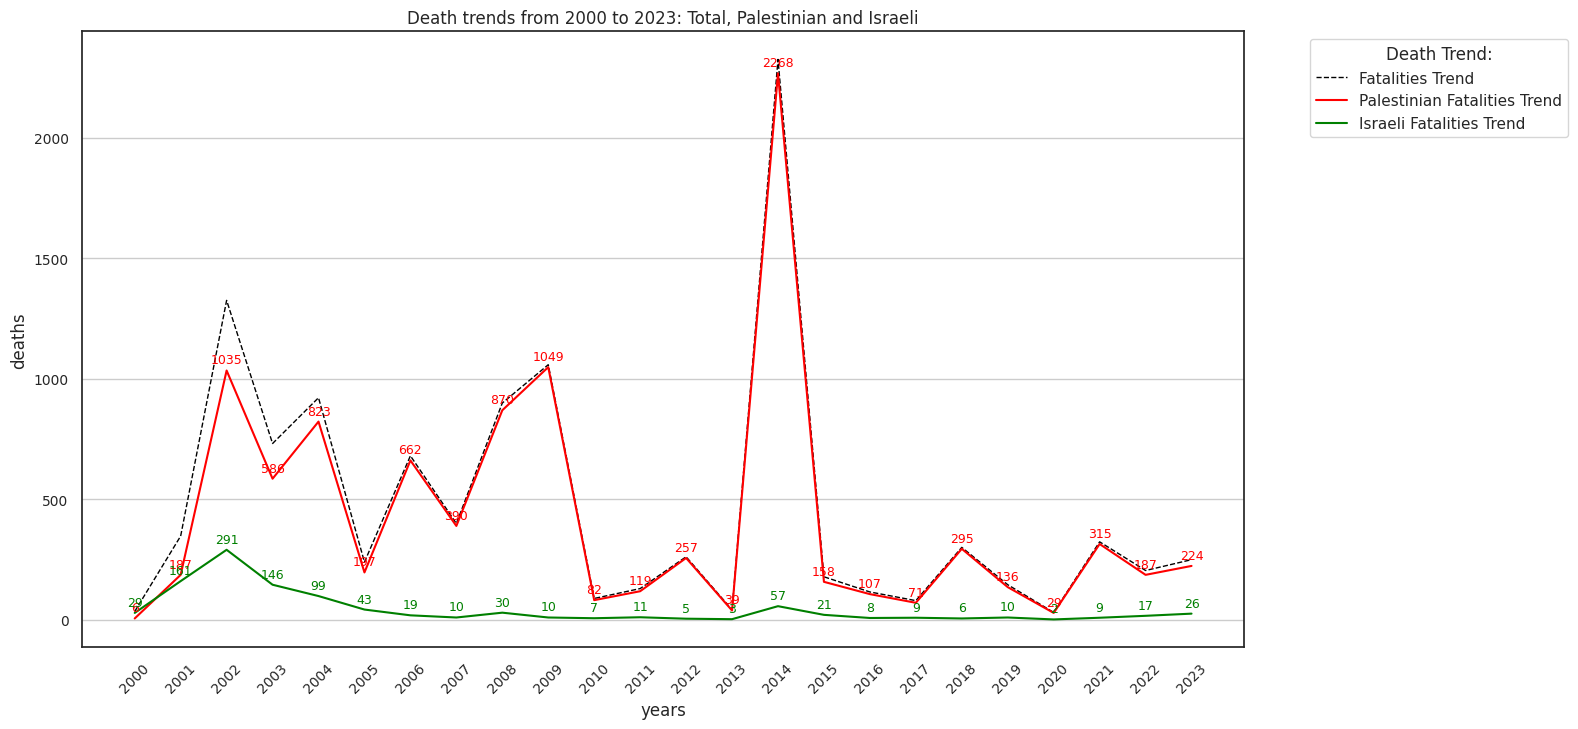

In [245]:
plt.figure(figsize=(15, 8))
plt.title('Death trends from 2000 to 2023: Total, Palestinian and Israeli')
plt.xlabel('years')
plt.ylabel('deaths')
plt.xticks(fatality_by_year['year'], rotation = 45, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

viridis_palette = sns.color_palette('viridis', n_colors=3)
selected_colors = [viridis_palette[0], viridis_palette[1], viridis_palette[2]]

####################

fatality_by_year = fatalities_df.groupby('year').size().reset_index(name='fatalities')

plot4 = sns.lineplot(x='year',
                     y='fatalities',
                     data=fatality_by_year,
                     markers=True,
                     color='black',
                     linestyle='dashed',
                     linewidth=1,
                     label='Fatalities Trend')

####################

palestinian_data = fatalities_df[fatalities_df['citizenship'] == 'Palestinian']
palestinian_fatalities_by_year = palestinian_data.groupby('year').size().reset_index(name='palestinian_fatalities')

sns.lineplot(x='year',
             y='palestinian_fatalities',
             data = palestinian_fatalities_by_year,
             markers=True,
             color='red',
             label='Palestinian Fatalities Trend')

for i, txt in enumerate(palestinian_fatalities_by_year['palestinian_fatalities']):
    plt.annotate(txt, (palestinian_fatalities_by_year['year'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', color='red', fontsize = 9)

####################

israeli_data = fatalities_df[fatalities_df['citizenship'] == 'Israeli']
israeli_fatalities_by_year = israeli_data.groupby('year').size().reset_index(name='israeli_fatalities')

sns.lineplot(x='year',
             y='israeli_fatalities',
             data=israeli_fatalities_by_year,
             markers=True,
             color='green',
             label='Israeli Fatalities Trend')

for i, txt in enumerate(israeli_fatalities_by_year['israeli_fatalities']):
    plt.annotate(txt, (israeli_fatalities_by_year['year'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', color='green', fontsize = 9)

####################

plt.legend(title='Death Trend:', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.show()

## Analysis of the most frequent words in the dataset notes

In [33]:
from wordcloud import WordCloud

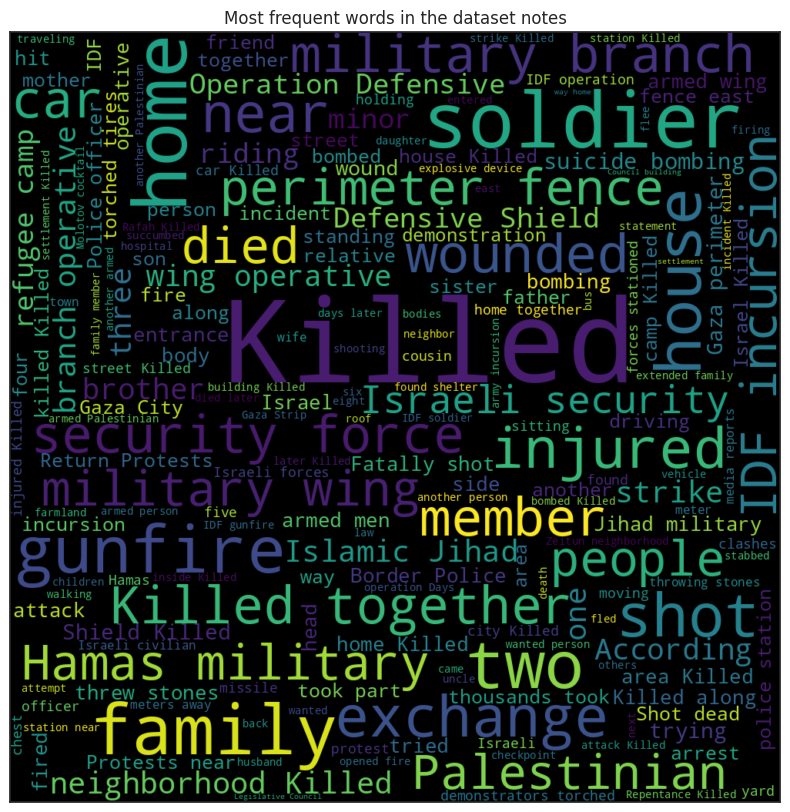

In [34]:
words_in_note = ''.join(fatalities_df['notes'].astype(str))

wordcloud = WordCloud(width=1000, height=1000,
            min_font_size = 10, max_font_size=150).generate(words_in_note)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.xticks([]), plt.yticks([])
plt.title('Most frequent words in the dataset notes')
plt.show()

## Fatalities by age

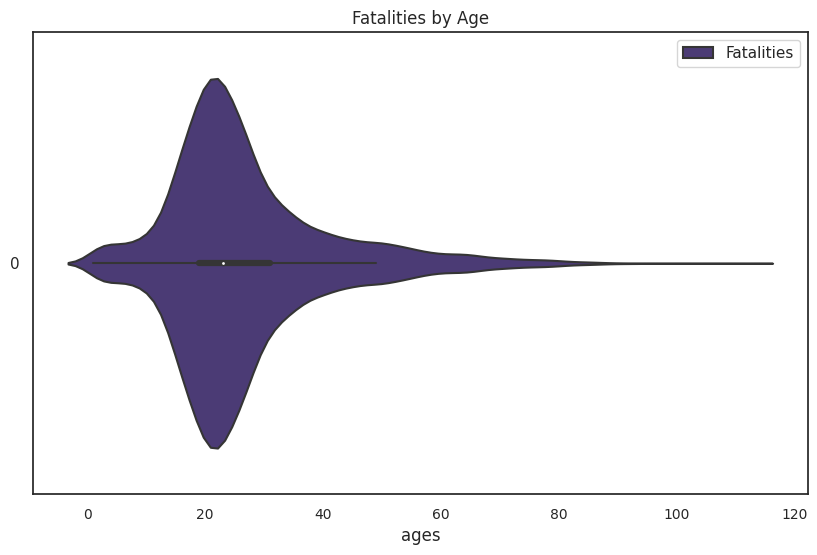

In [199]:
plt.figure(figsize=(10, 6))
plt.title('Fatalities by Age')
plt.xlabel('ages')
plt.ylabel(None)
plt.xticks(rotation = 0, fontsize=10)


sns.violinplot(fatalities_df['age'], orient='h', palette = sns.color_palette("viridis"))

plt.grid(False)
plt.legend(['Fatalities'], loc='upper right')
plt.show()

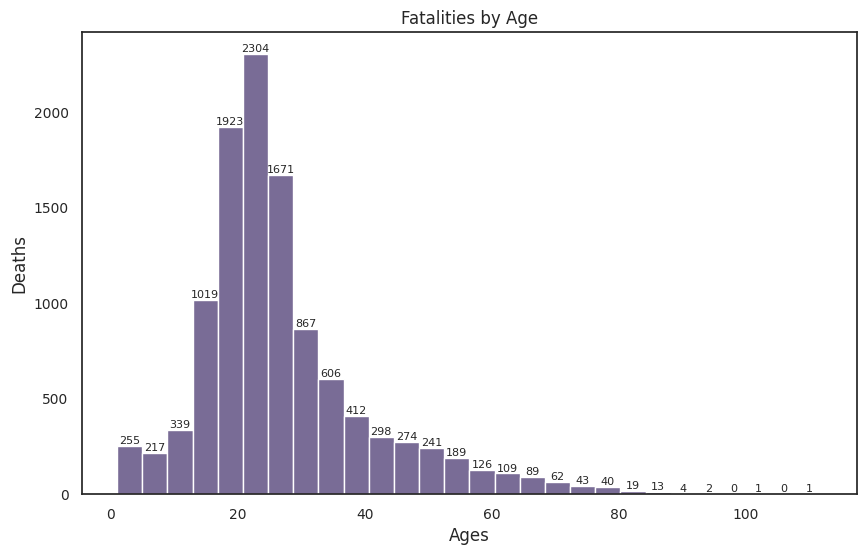

In [222]:
plt.figure(figsize=(10, 6))
sns.set(style="white")

ax = sns.histplot(fatalities_df['age'], bins=28, stat='count', color= '#4c3b73')

plt.yticks()
plt.grid(False)

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8)


plt.title('Fatalities by Age')
plt.xlabel('Ages')
plt.ylabel('Deaths')
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

plt.show()


Investigating deaths by age and gender

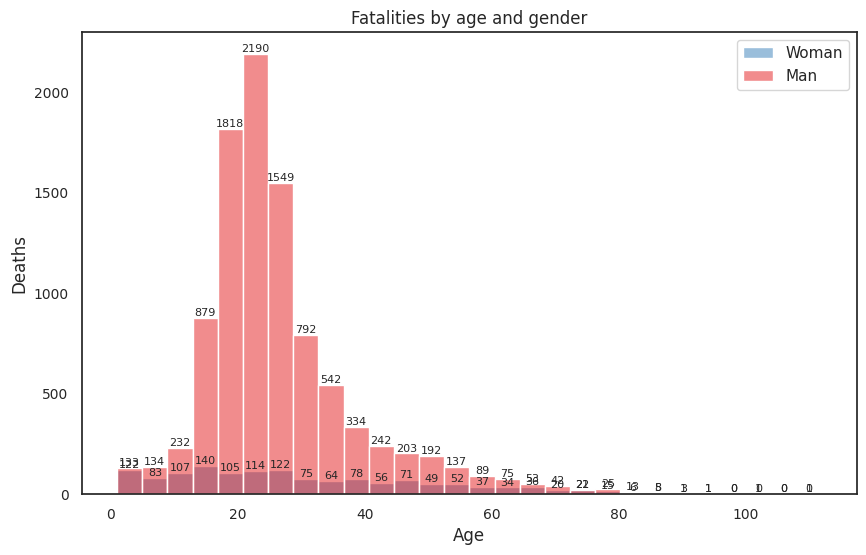

In [197]:
plt.figure(figsize=(10, 6))

sns.set(style="white", palette="Set1")

ax = sns.histplot(data=fatalities_df, x='age', hue='gender', bins=28)

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom', fontsize=8)

plt.title("Fatalities by age and gender")
plt.xlabel("Age")
plt.ylabel("Deaths")
plt.legend(['Woman', 'Man'])
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

plt.show()

## types of injury and responsible entities

In [38]:
fatalities_df['killed_by'].unique()

array(['Israeli security forces', 'Palestinian civilians',
       'Israeli civilians'], dtype=object)

In [39]:
killed_count = fatalities_df['killed_by'].value_counts()
killed_count

Israeli security forces    10000
Palestinian civilians       1028
Israeli civilians             96
Name: killed_by, dtype: int64

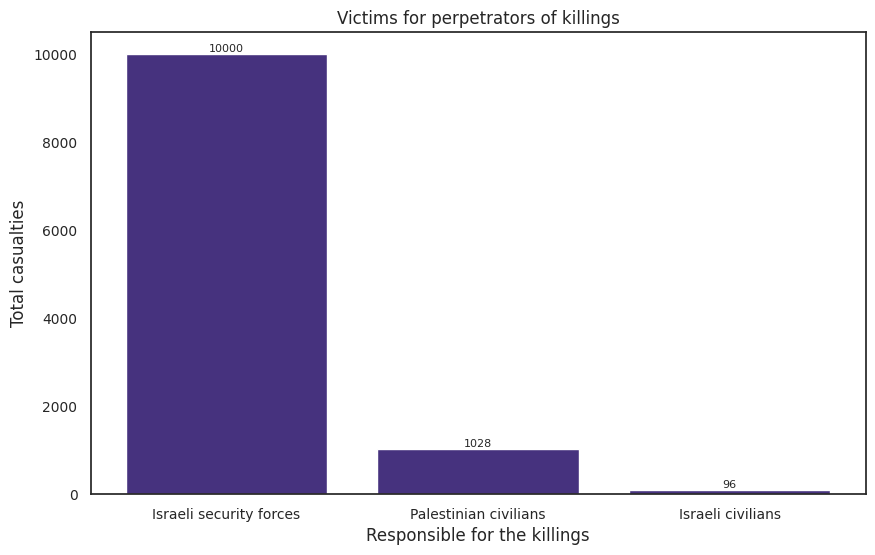

In [196]:
plt.figure(figsize=(10, 6))
sns.set(style = "white",  palette = sns.color_palette("viridis"))

bars = plt.bar(killed_count.index, killed_count.values, color= '#4c3b73')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)


plt.bar(killed_count.index, killed_count.values)
plt.title('Victims for perpetrators of killings')
plt.xlabel('Responsible for the killings')
plt.ylabel('Total casualties')
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

plt.show()

In [41]:
fatalities_df['type_of_injury'].unique()

array(['gunfire', 'stabbing', 'hit by a vehicle', 'explosion',
       'physical assault', 'shelling', 'being bludgeoned with an axe',
       'physically assaulted', 'beating', 'stones throwing',
       'Strangulation', 'fire', 'house demolition'], dtype=object)

In [42]:
injury = fatalities_df['type_of_injury'].value_counts()
injury

gunfire                         10140
explosion                         555
shelling                          311
stabbing                           48
house demolition                   25
hit by a vehicle                   18
beating                             9
stones throwing                     6
being bludgeoned with an axe        4
fire                                4
physically assaulted                2
physical assault                    1
Strangulation                       1
Name: type_of_injury, dtype: int64

In [43]:
injuries_top5 = injury.head(5)
injuries_top5

gunfire             10140
explosion             555
shelling              311
stabbing               48
house demolition       25
Name: type_of_injury, dtype: int64

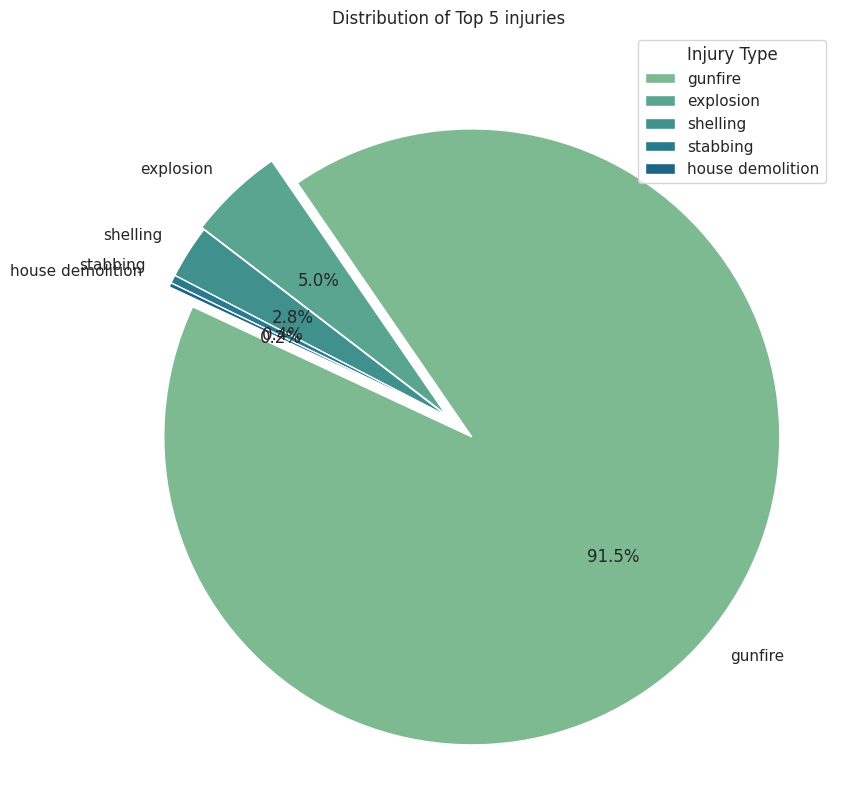

In [229]:
plt.figure(figsize=(10, 10))
sns.set(style="white", palette = sns.color_palette("crest"))
explode = (0.1, 0.01, 0, 0, 0)

plt.pie(injuries_top5.values, explode = explode, labels = injuries_top5.index, autopct='%1.1f%%', startangle=155)
plt.title('Distribution of Top 5 injuries')

plt.legend(title="Injury Type", labels= injuries_top5.index, loc="upper right")

plt.show()

In [45]:
fatalities_df['casualty_count'] = 1
killed_injury = fatalities_df.groupby(['killed_by', 'type_of_injury'])['casualty_count'].sum().reset_index()
killed_injury_pivot = killed_injury.pivot(index='killed_by', columns='type_of_injury', values='casualty_count').fillna(0)
killed_injury_pivot

type_of_injury,Strangulation,beating,being bludgeoned with an axe,explosion,fire,gunfire,hit by a vehicle,house demolition,physical assault,physically assaulted,shelling,stabbing,stones throwing
killed_by,,,,,,,,,,,,,
Israeli civilians,0.0,0.0,0.0,0.0,3.0,86.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0
Israeli security forces,0.0,5.0,0.0,47.0,1.0,9606.0,3.0,25.0,0.0,1.0,311.0,1.0,0.0
Palestinian civilians,1.0,4.0,4.0,508.0,0.0,448.0,14.0,0.0,1.0,1.0,0.0,43.0,4.0


<Figure size 1000x1000 with 0 Axes>

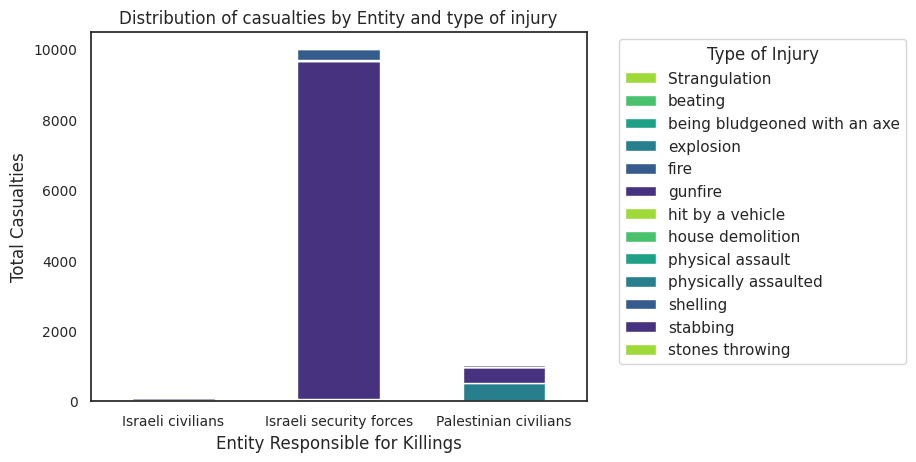

In [195]:
plt.figure(figsize=(10, 10))
sns.set(style = "white",  palette = sns.color_palette("viridis_r"))

ax = killed_injury_pivot.plot(kind='bar', stacked=True)

plt.title('Distribution of casualties by Entity and type of injury')
plt.xlabel('Entity Responsible for Killings')
plt.ylabel('Total Casualties')
plt.xticks(rotation = 0, fontsize=10)
plt.yticks(rotation = 0, fontsize=10)

plt.legend(title='Type of Injury', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## EXTRA: add a map to visualize the main areas where deaths occur
how to use folium:
*   https://www.youtube.com/watch?v=H8Ypb8Ei9YA
*   https://python-visualization.github.io/folium/latest/user_guide.html
*   https://realpython.com/lessons/python-folium-get-started/


add a dictionary with all the coordinates of the districts from the database

In [47]:
district_coords = {
    'Gaza': [31.5, 34.466667],
    'Hebron': [31.532569, 35.095388],
    'Jenin': [32.457336, 35.286865],
    'Nablus': [32.221481, 35.254417],
    'Ramallah': [31.902922, 35.206209],
    'Bethlehem': [31.705791, 35.200657],
    'Tulkarm': [32.308628, 35.028537],
    'Jericho': [31.857163, 35.444362],
    'Rafah': [31.296866, 34.245536],
    'Khan Yunis': [31.346201, 34.306286]
}

In [48]:
district_fatalities = fatalities_df.groupby('event_location_district').size()

function for select the right color based on the number of fatalities

In [49]:
def get_color(fatalities):
    if fatalities > 500:
        return 'red'
    elif fatalities > 250:
        return 'orange'
    elif fatalities > 100:
        return 'yellow'
    else:
        return 'green'

starting with a base map to initialize the following code

In [50]:
base_map = folium.Map(location=[32, 34.75], zoom_start=9)

adding markers on the pointer and setting the circles areas

In [62]:
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(location = coords, tooltip = f'District: {district}, Deaths: {fatalities}', icon = None).add_to(base_map)
    folium.Circle(location=coords, radius=np.sqrt(fatalities) * 1200, color=get_color(fatalities), fill=True, fill_color=get_color(fatalities), fill_opacity=0.6,).add_to(base_map)

folium.LayerControl().add_to(base_map)

base_map